<a href="https://colab.research.google.com/github/Pablo2710/ProyectoDSI/blob/main/ProyectoDSParteI_Martinez_Pablo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pablo A. Martinez

Data Science I - CoderHouse





# **Detección Exploratoria de Fraude en Transacciones Financieras**

Este proyecto se inicia con un Análisis Exploratorio de Datos (EDA) sobre un conjunto sintético de $\mathbf{5 \text{ millones}}$ de transacciones financieras. Este dataset fue generado mediante un script de Python, para replicar comportamientos de fraude y anomalías del mundo real, proporcionando una base sólida para investigaciones de Data Science. El conjunto de datos abarca $\mathbf{18 \text{ atributos}}$ detallados, incluyendo variables críticas como los montos (amount), el tipo de transacción, características de comportamiento de la cuenta (como el velocity_score y el spending_deviation_score), metadatos contextuales (location, device_used) y la etiqueta binaria de fraude (is_fraud).
La etapa inicial tiene un doble propósito: primero, obtener una comprensión profunda de la distribución y composición de las transacciones fraudulentas; y segundo, identificar las señales de alerta más fuertes que guiarán la construcción de un modelo predictivo robusto. Para lograr esto, utilizaremos visualizaciones y resúmenes numéricos para validar hipótesis clave.
La exploración se centrará en responder si las transacciones marcadas como fraude presentan un patrón estadísticamente diferente al de las transacciones legítimas. Esto implica investigar la relación entre el amount, los indicadores de riesgo de comportamiento y la etiqueta is_fraud mediante análisis bivariados. Además, se desarrollarán gráficos multivariados que permitan diagnosticar la interacción de tres o más factores contextuales (como la combinación de $\text{"transaction_type"}$, $\text{"merchant_category"}$ y $\text{"location"}$) y su impacto en la tasa de fraude.
El proceso también incluirá un paso esencial de diagnóstico de la calidad de los datos, con una identificación explícita de los valores perdidos, particularmente en variables como $\text{"time_since_last_transaction"}$ y $\text{"fraud_type"}$. Los resultados de este EDA no solo proporcionarán una visión clara de los drivers del fraude, sino que también servirán de base empírica para la ingeniería de características y el enfoque de modelado en etapas posteriores del proyecto.

## *PREGUNTAS E HIPOTESIS*

***Problemas a Resolver***

1.  ¿Cuál es la tasa de fraude global y cómo se distribuyen las transacciones fraudulentas según la hora o el día?
2.   Hay diferencias significativas en el amount promedio o en el velocity_score entre las transacciones fraudulentas y las legítimas? (Análisis Bivariado)
1.   ¿Cuales combinaciones de factores (por ejemplo, transaction_type, location y device_used) muestran una mayor proporción de fraude?
2.  ¿Cómo influyen los indicadores de riesgo calculados (como spending_deviation_score y geo_anomaly_score) en la probabilidad de que una transacción sea catalogada como fraude? (Análisis Multivariado/Correlación)

***Hipótesis a Comprobar***


*   **H1 (Monto y Velocidad):** Las transacciones fraudulentas tendrán un "amount" mucho mayor que la mediana y un velocity_score significativamente más alto (más transacciones en poco tiempo), indicando actividad sospechosa.
*   **H2 (Categoría/Ubicación):** Habrá mayor probabilidad de fraude asociada con ciertas "merchant_category" cuando la "location" no es la habitual del usuario (indicada por un alto "geo_anomaly_score").
*   **H3 (Dispositivo y Tipo):** El fraude es más frecuente en transacciones de tipo "transfer" o "withdrawal" y cuando el "device_used" es "mobile" o "atm", en comparación con el uso de pos.


## *Importación de Librerías y Configuración de Visualizaciones*

In [1]:
# Importar Librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Configuraciones de visualización
sns.set_theme(style="whitegrid") # Establece un tema estético para los gráficos
plt.rcParams['figure.figsize'] = (12, 6) # Establece un tamaño de figura por defecto
warnings.filterwarnings('ignore') # Ignora advertencias

##*Análisis Exploratorio de Datos*

In [2]:
 # 1. Cargar el dataset directamente desde GitHub
 financial_fraud=pd.read_csv('https://media.githubusercontent.com/media/Pablo2710/ProyectoDSI/refs/heads/main/financial_fraud_detection_dataset.csv')

In [3]:
# 2. Confirmación de la carga exitosa
print("\nPrimeras 5 filas:")
display(financial_fraud.head())
print("\n\nÚltimas 5 filas:")
display(financial_fraud.tail())
print("\n\nInformación del DataFrame:")
print(f"\nDimensiones: {financial_fraud.shape}")
print(f"\nColumnas: {financial_fraud.columns}\n")


Primeras 5 filas:


,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601




Últimas 5 filas:


,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
4999995,T5099995,2023-11-17T23:20:29.746144,ACC597319,ACC749300,10.87,withdrawal,retail,Toronto,atm,False,NaN,1416.524233,-0.14,17,0.18,UPI,243.92.38.163,D4439579
4999996,T5099996,2023-09-23T11:23:20.659686,ACC749625,ACC709783,181.40,payment,grocery,Sydney,atm,False,NaN,999.089702,-1.79,4,0.58,wire_transfer,28.252.18.249,D5029311
4999997,T5099997,2023-11-18T00:52:34.527092,ACC629492,ACC680736,12.54,payment,utilities,New York,mobile,False,NaN,3871.584025,-0.30,6,0.99,card,111.199.174.121,D6333607
4999998,T5099998,2023-03-25T04:32:13.609837,ACC984720,ACC296935,376.29,deposit,restaurant,Dubai,pos,False,NaN,-4096.765453,-1.43,5,0.32,wire_transfer,221.110.215.14,D1551203
4999999,T5099999,2023-09-02T04:34:34.583803,ACC120255,ACC440137,7.27,transfer,grocery,Sydney,atm,False,NaN,5257.349021,0.08,14,0.40,wire_transfer,246.68.126.184,D1505627




Información del DataFrame:

Dimensiones: (5000000, 18)

Columnas: Index(['transaction_id', 'timestamp', 'sender_account', 'receiver_account',
       'amount', 'transaction_type', 'merchant_category', 'location',
       'device_used', 'is_fraud', 'fraud_type', 'time_since_last_transaction',
       'spending_deviation_score', 'velocity_score', 'geo_anomaly_score',
       'payment_channel', 'ip_address', 'device_hash'],
      dtype='object')



In [4]:
financial_fraud.dtypes

,0
transaction_id,object
timestamp,object
sender_account,object
receiver_account,object
amount,float64
transaction_type,object
merchant_category,object
location,object
device_used,object
is_fraud,bool


In [5]:
financial_fraud.count()

,0
transaction_id,5000000
timestamp,5000000
sender_account,5000000
receiver_account,5000000
amount,5000000
transaction_type,5000000
merchant_category,5000000
location,5000000
device_used,5000000
is_fraud,5000000


### *Descripción estadística del DataFrame:*

In [6]:
financial_fraud.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
amount,5000000.0,358.93,469.93,0.01,26.57,138.67,503.89,3520.57
time_since_last_transaction,4103487.0,1.53,3576.57,-8777.81,-2562.38,0.84,2568.34,8757.76
spending_deviation_score,5000000.0,-0.00,1.00,-5.26,-0.68,0.00,0.67,5.02
velocity_score,5000000.0,10.50,5.77,1.00,5.00,11.00,16.00,20.00
geo_anomaly_score,5000000.0,0.50,0.29,0.00,0.25,0.50,0.75,1.00


##*Limpieza de Datos*

*Identificación de Valores Nulos*

In [16]:
# Cuenta valores nulos por columna
null_values_count = financial_fraud.isnull().sum()

# Calcula el porcentaje de valores nulos
total_rows = len(financial_fraud)
null_values_percentage = ((null_values_count / total_rows) * 100).round(2)

# Crea un DataFrame de resumen de valores nulos
missing_data = pd.DataFrame({
    'Valores Faltantes': null_values_count,
    'Porcentaje (%)': null_values_percentage
})

# Filtra y ordena las columnas con valores nulos
missing_data = missing_data[missing_data['Valores Faltantes'] > 0].sort_values(by='Porcentaje (%)', ascending=False)

print("Resumen de Columnas con Valores Nulos:")
display(missing_data)

Resumen de Columnas con Valores Nulos:


,Valores Faltantes,Porcentaje (%)
fraud_type,4820447,96.41
time_since_last_transaction,896513,17.93


**ANALISIS DE LOS VALORES NULOS**

*   *Columna fraud_type:*

    En este caso la ausencia de valor es informativa. El tipo de fraude solo se registra cuando la transacción es fraudulenta (is_fraud = True). El 96.41% de las transacciones son consideradas legítimas.

*   *Columna time_since_last_transaction:*

    La ausencia de valores probablemente corresponden a las primeras transacciones de las cuentas registradas, donde no existe un historial previo para calcular el tiempo transcurrido.

*Identificación de Valores Duplicados*

In [8]:
financial_fraud.duplicated().sum()

np.int64(0)

### *Detección de Outliers*

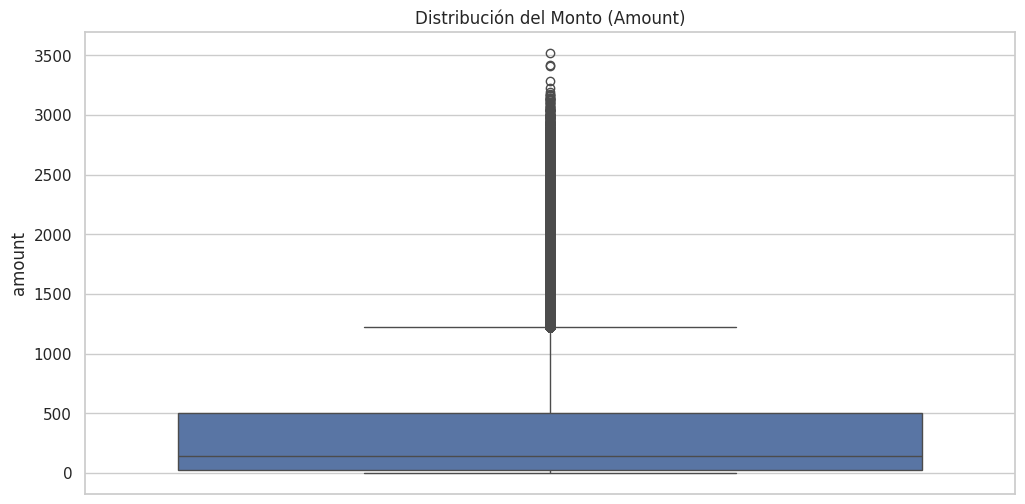

In [9]:
# Boxplot de la variable 'amount'
sns.boxplot(financial_fraud['amount'])
plt.title('Distribución del Monto (Amount)')
plt.show()

El BoxPlot de la variable amount muestra una extrema concentración de los datos y una alta dispersión de valores atípicos (outliers):

1.   Concentración Central: La caja que representa el Rango Intercuartílico es extremadamente pequeña y está muy cerca del cero, lo que indica que la gran mayoría de las transacciones son de montos bajos o moderados.La mediana es muy baja, lo que confirma que el 50% de las transacciones tienen un valor inferior a ese punto.
2.   Presencia de Outliers: El gráfico está dominado por una gran cantidad de puntos por encima del "bigote" superior. Existen transacciones con montos que superan los $3500$ (e incluso más allá), mientras que el 75% de las transacciones está considerablemente por debajo de los $1250$ (el valor del bigote superior es aproximadamente $1250$).Esta fuerte presencia de outliers indica que la variable amount presenta una distribución altamente asimétrica (o sesgada a la derecha).

Rango Intercuartílico (IQR)

In [10]:
# 1. Calculamos Q1 y Q3
Q1_amount = financial_fraud['amount'].quantile(0.25)
Q3_amount = financial_fraud['amount'].quantile(0.75)

# 2. Calculamos el IQR
IQR_amount = Q3_amount - Q1_amount

# 3. Definimos los límites
limite_inferior_amount = Q1_amount - 1.5 * IQR_amount
limite_superior_amount = Q3_amount + 1.5 * IQR_amount

In [17]:
print(f"Análisis para la columna amount (Monto):\n")
print(f"Q1: {Q1_amount}")
print(f"Q3: {Q3_amount}")
print(f"IQR: {IQR_amount}")
print(f"Límite Inferior: {limite_inferior_amount}")
print(f"Límite Superior: {limite_superior_amount}")

Análisis para la columna amount (Monto):

Q1: 26.57
Q3: 503.89
IQR: 477.32
Límite Inferior: -689.41
Límite Superior: 1219.87


In [12]:
# Filtramos para encontrar los outliers
outliers_amount = financial_fraud[(financial_fraud['amount'] < limite_inferior_amount) | (financial_fraud['amount'] > limite_superior_amount)]

print("Outliers de Montos encontrados con el método IQR:")
display(outliers_amount)

Outliers de Montos encontrados con el método IQR:


,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
10,T100010,2023-08-04T00:35:03.745267,ACC717024,ACC330914,1237.07,deposit,travel,New York,web,False,NaN,NaN,1.64,3,0.51,card,142.248.109.67,D8930103
14,T100014,2023-03-11T13:30:19.142152,ACC161324,ACC707314,1283.35,deposit,restaurant,New York,mobile,False,NaN,NaN,-1.96,6,0.06,UPI,41.95.35.34,D4946066
15,T100015,2023-05-29T03:04:25.786373,ACC358175,ACC707040,1258.92,deposit,travel,Dubai,atm,False,NaN,NaN,-0.04,7,0.67,wire_transfer,160.122.135.202,D3195773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999949,T5099949,2023-06-30T07:25:20.100074,ACC430670,ACC652295,1653.69,deposit,utilities,Dubai,pos,False,NaN,772.832110,1.07,18,0.39,UPI,76.53.119.76,D2540705
4999954,T5099954,2023-03-20T01:24:14.552053,ACC253124,ACC414486,1462.66,deposit,utilities,Singapore,mobile,False,NaN,-4176.901457,-2.06,15,0.69,card,157.141.136.1,D4193563
4999955,T5099955,2023-07-28T19:10:38.265289,ACC382001,ACC331415,1263.16,deposit,restaurant,Dubai,pos,False,NaN,3504.952749,0.75,2,0.94,UPI,236.254.81.204,D3927351
4999966,T5099966,2023-04-20T16:06:45.861113,ACC995598,ACC830774,1785.69,deposit,other,Sydney,pos,False,NaN,-5558.039159,0.86,5,0.65,wire_transfer,186.116.74.237,D5932712


### *Tratamiento de Outliers: Eliminación*

In [13]:
# Creamos una copia del DataFrame para no modificar el original
df_sin_outliers = financial_fraud.drop(outliers_amount.index)
display(df_sin_outliers)

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601
5,T100005,2023-11-20T17:49:27.940971,ACC581141,ACC249811,58.77,transfer,entertainment,Berlin,atm,False,NaN,NaN,-1.63,19,0.40,UPI,112.70.252.46,D1790481
6,T100006,2023-11-11T11:15:41.359248,ACC757924,ACC267753,59.51,payment,travel,Dubai,pos,False,NaN,NaN,-2.62,1,0.68,UPI,58.136.174.57,D5924115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,T5099995,2023-11-17T23:20:29.746144,ACC597319,ACC749300,10.87,withdrawal,retail,Toronto,atm,False,NaN,1416.524233,-0.14,17,0.18,UPI,243.92.38.163,D4439579
4999996,T5099996,2023-09-23T11:23:20.659686,ACC749625,ACC709783,181.40,payment,grocery,Sydney,atm,False,NaN,999.089702,-1.79,4,0.58,wire_transfer,28.252.18.249,D5029311
4999997,T5099997,2023-11-18T00:52:34.527092,ACC629492,ACC680736,12.54,payment,utilities,New York,mobile,False,NaN,3871.584025,-0.30,6,0.99,card,111.199.174.121,D6333607
4999998,T5099998,2023-03-25T04:32:13.609837,ACC984720,ACC296935,376.29,deposit,restaurant,Dubai,pos,False,NaN,-4096.765453,-1.43,5,0.32,wire_transfer,221.110.215.14,D1551203


Nuevo Boxplot - Sin Outliers

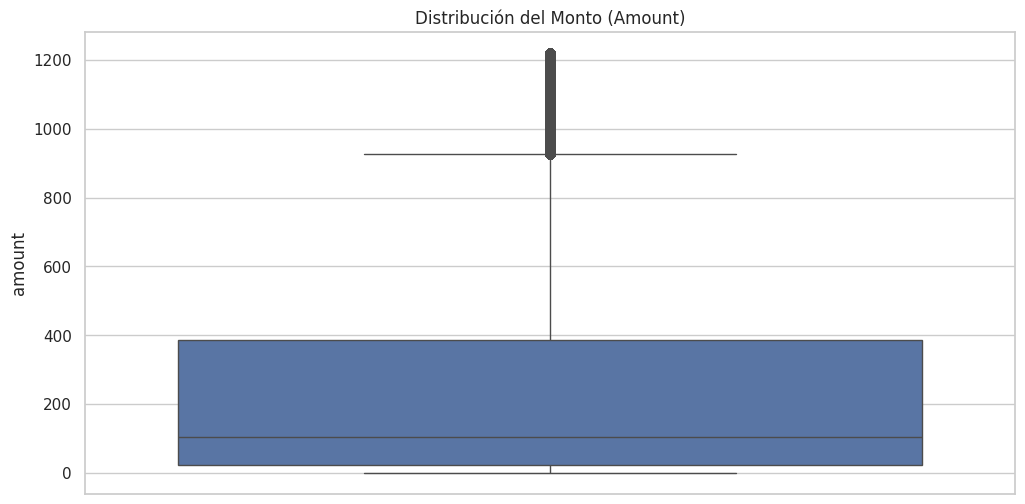

In [14]:
# Boxplot de la variable 'amount'
sns.boxplot(df_sin_outliers['amount'])
plt.title('Distribución del Monto (Amount)')
plt.show()

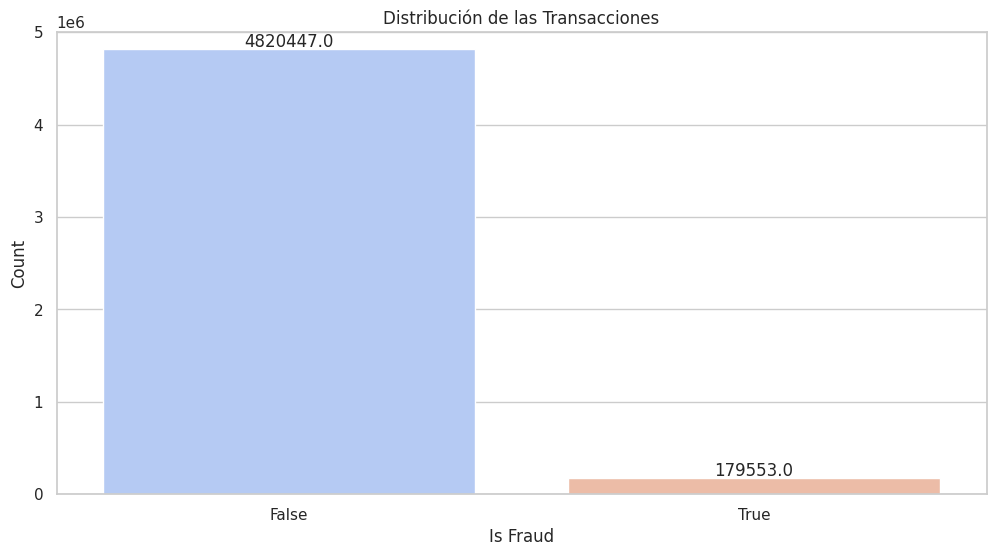

In [15]:
# Countplot de la variable 'is_fraud'
ax = sns.countplot(x=financial_fraud.is_fraud, palette='coolwarm')
plt.title('Distribución de las Transacciones')
plt.xlabel('Is Fraud')
plt.ylabel('Count')

# Añadir etiquetas de datos a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.ylim(0, 5000000)
plt.show()

El gráfico countplot para la variable objetivo (is_fraud) revela un desbalance importante de clases en el dataset:

1.   Transacciones Legítimas (False): Representan la gran mayoría de los datos.
2.   Transacciones Fraudulentas (True): Constituyen una fracción muy pequeña del total, próximo a las 180,000 transacciones.
En conclusión la Tasa de Fraude es extremadamente baja.

# A PARTIR DE ESTE PUNTO YA NO SÉ COMO SEGUIR Y ESTOY DUDANDO SI CAMBIAR EL DATASET O NO